**Import the packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np

**Read the Dataset**

In [ ]:
data=pd.read_csv("train-chennai-sale.csv")

In [ ]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**Column "PRT_ID" is not required to build the model. So, we will drop that column.**

In [ ]:
data.drop(columns=['PRT_ID'],inplace=True)

# **DATA Cleaning**

**Analyse the Data Column by Column**

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

**AREA**

In [ ]:
data.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

**In the Above we see that the Same Area name has been repeated, in Different Case,typo errors. We need Clean those records first.**

In [ ]:
#Chrompt,Chrmpet,Chormpet These Values Needs to be Changed to "Chrompet"
data.AREA[data['AREA'].isin(["Chrompt","Chrmpet","Chormpet"])]="Chrompet"
#Karapakam This Values Needs to be Changed to "Karapakkam"
data.AREA[data['AREA']=="Karapakam"]="Karapakkam"
#KKNagar This Values Needs to be Changed to "KK Nagar"
data.AREA[data['AREA']=="KKNagar"]="KK Nagar"
#Velchery This Values Needs to be Changed to "Velachery"
data.AREA[data['AREA']=="Velchery"]="Velachery"
#Ana Nagar,Ann Nagar These Values Needs to be Changed to "Anna Nagar"
data.AREA[data['AREA'].isin(["Ana Nagar","Ann Nagar"])]="Anna Nagar"
#TNagar This Values Needs to be Changed to "T Nagar"
data.AREA[data['AREA']=="TNagar"]="T Nagar"
#Adyr This Values Needs to be Changed to "Adyar"
data.AREA[data['AREA']=="Adyr"]="Adyar"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: Setti

In [ ]:
data.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

**INT_SQFT**

In [ ]:
data.INT_SQFT.value_counts()
# Data Looks Fine, No Cleaning/Imputation required for this Column

1781    18
1538    15
1505    13
1514    13
1634    12
        ..
559      1
2479     1
1330     1
880      1
598      1
Name: INT_SQFT, Length: 1699, dtype: int64

**DATE_SALE**

In [ ]:
#DATE_SALE needs to conveted as Datatime type
data['DATE_SALE']=pd.to_datetime(data['DATE_SALE'])

**DIST_MAINROAD**

In [ ]:
data.DIST_MAINROAD.value_counts()
# Data Looks Fine, No Cleaning/Imputation required for this Column

39     56
51     53
78     52
77     49
73     48
       ..
33     24
136    24
167    24
12     23
25     20
Name: DIST_MAINROAD, Length: 201, dtype: int64

**N_BEDROOM**

In [ ]:
data[data['N_BEDROOM'].isnull()]
# One record having the NaN value for N_BEDROOM and needs to be filled with "Median"value
data.N_BEDROOM[data['N_BEDROOM'].isnull()]=data.N_BEDROOM.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**N_BATHROOM**

In [ ]:
data[data['N_BATHROOM'].isnull()]
# Five records having the NaN value for N_BEDROOM and needs to be filled with "Median"value
data.N_BATHROOM[data['N_BATHROOM'].isnull()]=data.N_BATHROOM.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**N_ROOM**

In [ ]:
data[data['N_ROOM'].isna()]
# Data Looks Fine, No Cleaning/Imputation required for this Column

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


**SALE_COND**

In [ ]:
data.SALE_COND.value_counts()


AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

**In the Above we see that the Same Sale Condition name has been repeated, in Different Case,typo errors. We need Clean those records first.**

In [ ]:
#AdjLand This Values Needs to be Changed to "Adj Land"
data.SALE_COND[data['SALE_COND']=="AdjLand"]="Adj Land"
#Partiall,PartiaLl These Values Needs to be Changed to "Partial"
data.SALE_COND[data['SALE_COND'].isin(["Partiall","PartiaLl"])]="Partial"
#Ab Normal This Values Needs to be Changed to "AbNormal"
data.SALE_COND[data['SALE_COND']=="Ab Normal"]="AbNormal"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.SALE_COND.value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

**PARK_FACIL**

In [ ]:
data.PARK_FACIL.value_counts()
#"Noo" This Values Needs to be Changed to "No"
data.PARK_FACIL[data['PARK_FACIL']=="Noo"]="No"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

**DATE_BUILD**

In [ ]:
#DATE_BUILD needs to conveted as Datatime type
data['DATE_BUILD']=pd.to_datetime(data['DATE_BUILD'])

**BUILDTYPE**

In [ ]:
data.BUILDTYPE.value_counts()
#"Comercial" This Values Needs to be Changed to "Commercial"
data.BUILDTYPE[data['BUILDTYPE']=="Comercial"]="Commercial"
#"Other" This Values Needs to be Changed to "Others"
data.BUILDTYPE[data['BUILDTYPE']=="Other"]="Others"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

**UTILITY_AVAIL**

In [ ]:
data.UTILITY_AVAIL.value_counts()
#"AllPub" This Values Needs to be Changed to "All Pub"
data.UTILITY_AVAIL[data['UTILITY_AVAIL']=="AllPub"]="All Pub"
#"NoSewr" This Values Needs to be Changed to "NoSeWa"
data.UTILITY_AVAIL[data['UTILITY_AVAIL']=="NoSeWr"]="NoSeWa"
data.UTILITY_AVAIL[data["UTILITY_AVAIL"]=="NoSewr "]="NoSeWa"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.UTILITY_AVAIL.value_counts()

NoSeWa     3700
All Pub    1887
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

**STREET**

In [ ]:
data.STREET.value_counts()
#"Pavd" This Values Needs to be Changed to "Paved"
data.STREET[data['STREET']=='Pavd']='Paved'
#"NoAccess" This Values Needs to be Changed to "No Access"
data.STREET[data['STREET']=='NoAccess']='No Access'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

**MZZONE**

In [ ]:
data.MZZONE.value_counts()
# Data Looks Fine No Cleaning Needed.

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

**QS_ROOMS**

In [ ]:
data[data.QS_ROOMS.isna()]
# Data Looks Fine No Cleaning Needed.

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


**QS_BATHROOM**

In [ ]:
data[data.QS_BATHROOM.isnull()]
# Data Looks Fine No Cleaning Needed.

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


**QS_BEDROOM**

In [ ]:
data[data.QS_BEDROOM.isnull()]
# Data Looks Fine No Cleaning Needed.

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


**QS_OVERALL**

In [ ]:
# Null records needs to be filled.
print("MEDIAN: " +str(data.QS_OVERALL.median()))
print("MEAN: "+str(round(data.QS_OVERALL.mean(),1)))
#Both Mean & MEDIAN values are same.So, we can use either Mean or Median.
data.QS_OVERALL[data.QS_OVERALL.isnull()]=round(data.QS_OVERALL.mean(),1)

MEDIAN: 3.5
MEAN: 3.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


**REG_FEE**

In [ ]:
data[data.REG_FEE.isnull()]
# Data Looks fine, No Cleaning Required.

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


**COMMIS**

In [ ]:
data[data.COMMIS.isnull()]
# Data Looks fine, No Cleaning Required.

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


**SALES_PRICE**

In [ ]:
data[data.SALES_PRICE.isnull()]
# Data Looks fine, No Cleaning Required.

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


**Columns N_BEDROOM,N_BATHROOM,N_ROOM in type float but none of the data having decimal value, Hence will convert
columns to int type.**

In [ ]:
data.N_BEDROOM=data.N_BEDROOM.astype(int)
data.N_BATHROOM=data.N_BATHROOM.astype(int)
data.N_ROOM=data.N_ROOM.astype(int)

**DATA Cleaning Completed, Then we need to ENCODE the Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int64         
 5   N_BATHROOM     7109 non-null   int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

# **ENCODING**

**AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE seven columns contains catagorical data. These values needs to encoded.**

**AREA**

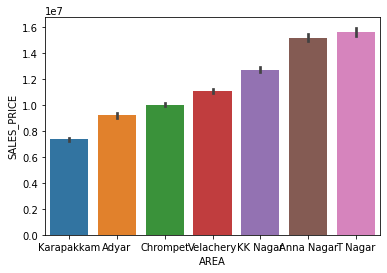

In [ ]:
# We plot AREA V/S SALES Price to See the Relationship of the Feature.
sns.barplot(x='AREA',y="SALES_PRICE",data=data,order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

From the above plot we see that the AREA is having a linear relationship with the SALES_PRICE.Hence, we do the Label Encoding for this.

In [ ]:
data.AREA=data.AREA.map({"Karapakkam":1,"Adyar":2,"Chrompet":3,"Velachery":4,"KK Nagar":5,"Anna Nagar":6,"T Nagar":7})

In [ ]:
data.AREA.value_counts()

3    1702
1    1366
5     997
4     981
6     788
2     774
7     501
Name: AREA, dtype: int64

**SALE_COND**

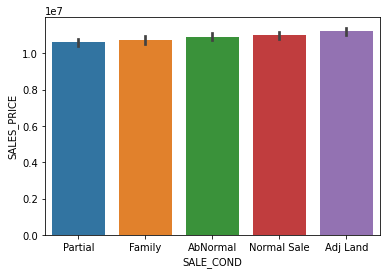

In [ ]:
# We plot SALE_COND V/S SALES Price to See the Relationship of the Feature.
sns.barplot(x='SALE_COND',y="SALES_PRICE",data=data,order=data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

From the above we see that the SALE_COND has Linear Relationship with the SALE_PRICE, Hence we can do Label Encoding for this feature. 

In [ ]:
data.SALE_COND=data.SALE_COND.map({"Partial":1,"Family":2,"AbNormal":3,"Normal Sale":4,"Adj Land":5})

In [ ]:
data.SALE_COND.value_counts()

5    1439
1    1433
4    1423
3    1411
2    1403
Name: SALE_COND, dtype: int64

**PARK_FACIL**

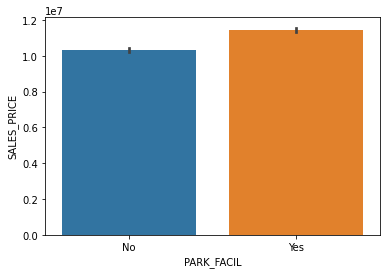

In [ ]:
# We plot PARK_FACIL V/S SALES Price to See the Relationship of the Feature.
sns.barplot(x='PARK_FACIL',y="SALES_PRICE",data=data,order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])

From the above we that PARK_FACIL has the Linear Relationship with SALES_PRICE, and We will do Label Encoding.

In [ ]:
data.PARK_FACIL=data.PARK_FACIL.map({"Yes":1,"No":0})

**BUILDTYPE**

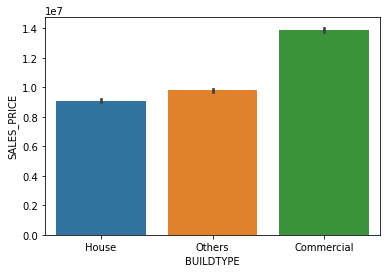

In [ ]:
# We plot BUILDTYPE V/S SALES Price to See the Relationship of the Feature.
sns.barplot(x='BUILDTYPE',y="SALES_PRICE",data=data,order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

From the above chart we see that, BUILDTYPE has the relationship with the SALES_PRICE but there is no linear relarionship, Hence we will One-Hot-Encoding for this.

In [ ]:
data=pd.concat([data,pd.get_dummies(data.BUILDTYPE)],axis=1)

In [ ]:
data.drop(columns=['BUILDTYPE'],inplace=True)

**UTILITY_AVAIL**

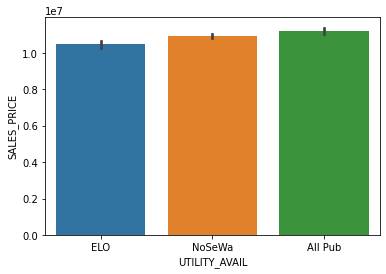

In [ ]:
# We plot UTILITY_AVAIL V/S SALES Price to See the Relationship of the Feature.
sns.barplot(x='UTILITY_AVAIL',y="SALES_PRICE",data=data,order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

From the above chart we see that, UTILITY_AVAIL has the Linear-relationship with the SALES_PRICE, Hence we will do Label Encoding for this.



In [ ]:
data.UTILITY_AVAIL=data.UTILITY_AVAIL.map({'ELO':1,'NoSeWa':2,'All Pub':3})

In [ ]:
data.UTILITY_AVAIL.value_counts()

2    3700
3    1887
1    1522
Name: UTILITY_AVAIL, dtype: int64

**N_BEDROOM**

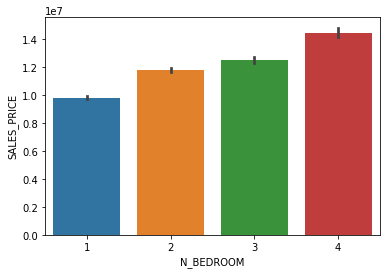

In [ ]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=data,order=data.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])

From the above chart we see that, N_BEDROOM has the relationship with the SALES_PRICE but there is non linear relarionship.

**N_ROOM**

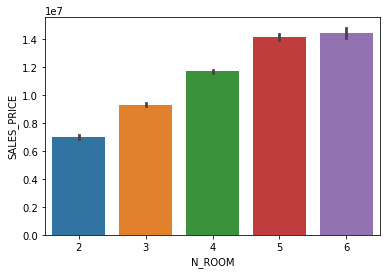

In [ ]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=data,order=data.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])

From the above chart we see that, N_ROOM has the relationship with the SALES_PRICE but there is non linear relarionship.

**STREET**

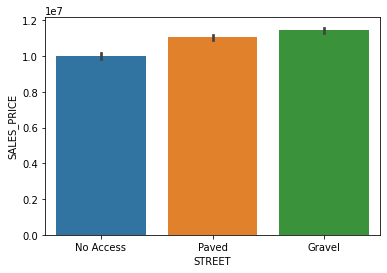

In [ ]:
# We plot STREET V/S SALES Price to See the Relationship of the Feature.
sns.barplot(x='STREET',y="SALES_PRICE",data=data,order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

From the above chart we see that, STREET has the linear relationship with the SALES_PRICE, Hence we will One-Hot-Encoding for this.

In [ ]:
data.STREET=data.STREET.map({"No Access":1,"Paved":2,"Gravel":3})

**MZZONE**

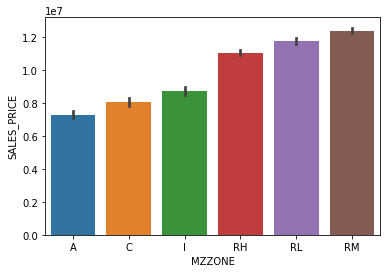

In [ ]:
# We plot MZZONE V/S SALES Price to See the Relationship of the Feature.
sns.barplot(x='MZZONE',y="SALES_PRICE",data=data,order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

From the above chart we see that, MZZONE has the Slight-Linear-relationship with the SALES_PRICE, Hence we will do Label Encoding for this.

In [ ]:
data.MZZONE=data.MZZONE.map({"A":1,"C":2,"I":3,"RH":4,"RL":5,"RM":6})

In [ ]:
data.MZZONE.value_counts()

5    1858
4    1822
6    1817
2     550
1     537
3     525
Name: MZZONE, dtype: int64

**We Encode the DATE_BUILD & DATE_SALE with year alone.EX: 01-05-2017 to 2017.Because we are going to predict the Price range of the house, and price won't change drastically within a year.**

In [ ]:
data['DATE_BUILD']=data['DATE_BUILD'].dt.year
data['DATE_SALE']=data['DATE_SALE'].dt.year

**We will Add two More columns, BUILDING_AGE (DATE_BUILD-DATE_SALE) & PRICE_PER_SQFT (SALE_PRICE/INT_SQFT)**

In [ ]:
data['BUILDING_AGE']=data['DATE_SALE']-data['DATE_BUILD']
data['PRICE_PER_SQFT']=(data['SALES_PRICE']/data['INT_SQFT']).astype(int)

Lets Compare BUILDING_AGE v/s PRICE_PER_SQFT

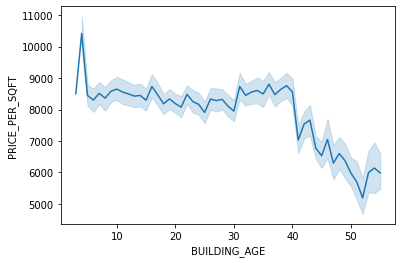

In [ ]:
sns.lineplot(x='BUILDING_AGE',y='PRICE_PER_SQFT',data=data)

In the above chart we see that the PRICE_PER_SQFT is getting reduced by age of the building. Building age is much related to the SALES_PRICE.

We added a new column 'PRICE_PER_SQFT', and we can use this as a Target instead of 'SALES_PRICE'. We will get better idea when we know the Price per Square feet House. Hence Will drop the SALES_PRICE column.

In [ ]:
data.drop(columns=['SALES_PRICE'],inplace=True)

In Data we are having COMMIS (Commission) & REG_FEE (Registration Fee) columns and these values will be calculated based on the Sales price of the house. Hence these columns are not require to build the model, So we can renove these columns.

In [ ]:
data.drop(columns=['COMMIS'],inplace=True)
data.drop(columns=['REG_FEE'],inplace=True)

In [ ]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Commercial,House,Others,BUILDING_AGE,PRICE_PER_SQFT
0,1,1004,2011,131,1,1,3,3,1,1967,...,1,4.0,3.9,4.9,4.330,1,0,0,44,7569
1,6,1986,2006,26,2,1,5,3,0,1995,...,4,4.9,4.2,2.5,3.765,1,0,0,11,10935
2,2,909,2012,70,1,1,3,3,1,1992,...,5,4.1,3.8,2.2,3.090,1,0,0,20,14476
3,4,1855,2010,14,3,2,5,2,0,1988,...,3,4.7,3.9,3.6,4.010,0,0,1,22,5191
4,1,1226,2009,84,1,1,3,3,1,1979,...,2,3.0,2.5,4.1,3.290,0,0,1,30,6040


In [ ]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Commercial,House,Others,BUILDING_AGE,PRICE_PER_SQFT
0,1,1004,2011,131,1,1,3,3,1,1967,...,1,4.0,3.9,4.9,4.330,1,0,0,44,7569
1,6,1986,2006,26,2,1,5,3,0,1995,...,4,4.9,4.2,2.5,3.765,1,0,0,11,10935
2,2,909,2012,70,1,1,3,3,1,1992,...,5,4.1,3.8,2.2,3.090,1,0,0,20,14476
3,4,1855,2010,14,3,2,5,2,0,1988,...,3,4.7,3.9,3.6,4.010,0,0,1,22,5191
4,1,1226,2009,84,1,1,3,3,1,1979,...,2,3.0,2.5,4.1,3.290,0,0,1,30,6040


# **Spliting the Training and Test data**

In [ ]:
features=data.columns[:21]
features

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'Commercial', 'House', 'Others',
       'BUILDING_AGE'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x=data[features]
y=data['PRICE_PER_SQFT']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
df=X_test

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

# **Model Building**

**Function for DecisionTree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
def dt_model():
  dt_best_depth=pd.DataFrame(columns=['Cross_val','Learning_rate'])
  for i in range(1,21):
    model = DecisionTreeRegressor(max_depth = i) # initialise the model
    model.fit(X_train,y_train) #train the model
    # scoring the model - r2 squared
    dt_best_depth.loc[model.score(X_test, y_test)]=[model.score(X_test, y_test),i]
    print("Max Depth : ", i, " Train score : ", model.score(X_train,y_train)," Test Score: ",model.score(X_test, y_test))
    dt_best_depth
  best_depth=dt_best_depth.loc[dt_best_depth.Cross_val.max()][1]
  print("best_depth:",best_depth)
  descision_tree_model=DecisionTreeRegressor(max_depth=int(best_depth))
  descision_tree_model.fit(X_train,y_train)
  descision_tree_model.score(X_test,y_test)
  return descision_tree_model

**Function for RandomForest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
def rf_model(feature_count):
  max_dpth=round(np.log2(feature_count))
  random_forest_model = RandomForestRegressor(n_estimators = 100,max_depth=max_dpth,max_features="sqrt")
  #log(No.of.Features)/log(2) => Max Depth.
  random_forest_model.fit(X_train, y_train)
  random_forest_model.score(X_test,y_test)
  return random_forest_model

**Function for XGBoost Regression**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
def xb_model():
  xgb_best_lr=pd.DataFrame(columns=['Cross_val','Learning_rate'])
  for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100,verbosity = 0) # initialise the model
    model.fit(X_train,y_train) #train the model
    print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))
    cross_val=round(np.mean(cross_val_score(model, X_train, y_train, cv=10)),2)
    xgb_best_lr.loc[cross_val]=[cross_val,lr]
  best_learn_rate=xgb_best_lr.loc[xgb_best_lr.Cross_val.max()][1]
  print('Best_Learn_Rate: ',best_learn_rate) 
  xgb_model = xgb.XGBRegressor(learning_rate = best_learn_rate,n_estimators=100, verbosity = 0)
  xgb_model.fit(X_train,y_train) 
  xgb_model.score(X_test, y_test) 
  return xgb_model

**Function to Evaluate the Models and Get the Best Model Based on R2 Score**

In [ ]:
from sklearn.metrics import r2_score

def get_models_r2(model_list,X_test,y_test):
  try:
    r2_score_list={}
    #Compute R2 for the all the models
    print("Compute R2 for the all the models")
    for i in model_list:
      y_pred = model_list[i].predict(X_test)
      r2_score_list[r2_score(y_test,y_pred)]=i
    return r2_score_list
  
  except Exception as e:
    print(str(e))
  

**Lets Build the Models and find which is best among themselves based on R2 Score.**

In [ ]:
def build_all_models():
  try:
    model_list={}
    print("Building Decision Tree Model")
    model_list["DecisionTreeRegressor"]=dt_model()
    print("Building RandomForest Model")
    model_list["RandomForestRegressor"]=rf_model(len(features))
    print("Building XGBoost Model")
    model_list["XGBRegressor"]=xb_model()

    r2_score_list=get_models_r2(model_list,X_test,y_test)
    #Compare which model has best R2:
    best_r2=-1
    first_model=0
    print("Compare which model has best R2")
    for i in r2_score_list:
        if first_model==0:
          best_r2=i
          first_model=1
        else:
          if i>best_r2:
            best_r2=i
    # return the Model which having the best R2
    print("\n\n******************************************************")
    print("Best Model based on R2_score is : ",r2_score_list[best_r2], " and its R2_Score is ",str(best_r2))
    print("\n******************************************************")

    
    x=r2_score_list.values()
    y=r2_score_list.keys()
    
    plt.title("Models v/s R2 Score")
    plt.xlabel("Models")
    plt.ylabel("R2-Score")
    plt.xticks(rotation=90)
    plt.bar(x,y)

    return model_list[r2_score_list[best_r2]]
  except Exception as error:
    print(error)



**Lets Build the Models and find which is best Among ThemSelves.**

Building Decision Tree Model
Max Depth :  1  Train score :  0.36146979521657563  Test Score:  0.3607199104744634
Max Depth :  2  Train score :  0.566294910258103  Test Score:  0.5558775144717969
Max Depth :  3  Train score :  0.7237254590418695  Test Score:  0.7128092977512814
Max Depth :  4  Train score :  0.8146881022161766  Test Score:  0.8093930842218787
Max Depth :  5  Train score :  0.8652227045566508  Test Score:  0.8592991024252228
Max Depth :  6  Train score :  0.9029215761331773  Test Score:  0.9002525027526068
Max Depth :  7  Train score :  0.9289996792173745  Test Score:  0.9241034939757156
Max Depth :  8  Train score :  0.9520897011162015  Test Score:  0.9355587014114785
Max Depth :  9  Train score :  0.9701831711915908  Test Score:  0.9389510516564924
Max Depth :  10  Train score :  0.9827975844081708  Test Score:  0.9434522890631613
Max Depth :  11  Train score :  0.9907062622839069  Test Score:  0.9409978581475357
Max Depth :  12  Train score :  0.9952924525029596  Test

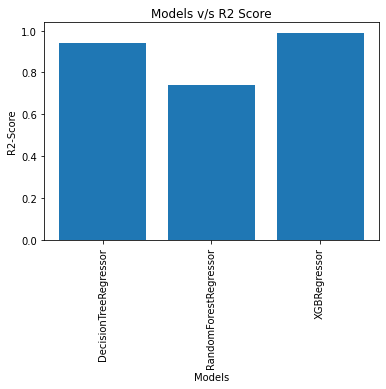

In [ ]:
Best_Model=build_all_models() # Build All Models and get the Best model based on R2 Score.


**Lets Predict the Data with the Best Model identified**

In [ ]:
y_predict=Best_Model.predict(X_test)


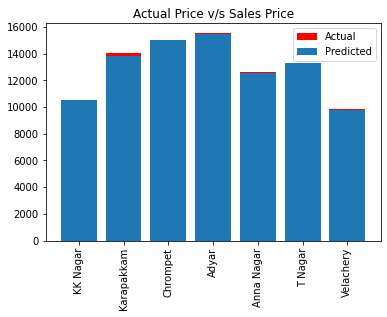

In [ ]:
x=df['AREA'].map({1:"Karapakkam",2:"Adyar",3:"Chrompet",4:"Velachery",5:"KK Nagar",6:"Anna Nagar",7:"T Nagar"})
y=y_test
plt.title("Actual Price v/s Sales Price")
plt.xticks(rotation=90)
plt.bar(x,y,color='red',label='Actual')
plt.bar(x,y_predict,label='Predicted')
plt.legend(loc='best')

# **Final Result**

**As per our Requirement lets Find the Price Range for the House.**

In [ ]:
df["Predicted_Sales_Price"]=y_predict.astype(int) 

In [ ]:
df.AREA=df.AREA.map({1:"Karapakkam",2:"Adyar",3:"Chrompet",4:"Velachery",5:"KK Nagar",6:"Anna Nagar",7:"T Nagar"})

To Calculate the Price Range, Lets get the Standard Deviation of the Predicted_Sales_Price by AREA wise and then subract the SD value with Predicted_Sales_Price to find the Lower Price Range and use the Predicted_Sales_Price value as the Upper Price range.

In [ ]:
df['Predicted_Sales_Price_Range']=0

In [ ]:
round(df[df['AREA']=='Karapakkam'].Predicted_Sales_Price.std())

2038

In [ ]:
df_lower_range=(df.Predicted_Sales_Price[df['AREA']=='Karapakkam'] - 2038).astype(int)
df.Predicted_Sales_Price_Range[df['AREA']=='Karapakkam']= df_lower_range.astype(str) +"  -  "+df.Predicted_Sales_Price[df['AREA']=='Karapakkam'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
round(df[df['AREA']=='Adyar'].Predicted_Sales_Price.std())

2557

In [ ]:
df_lower_range=(df.Predicted_Sales_Price[df['AREA']=='Adyar'] - 2557).astype(int)
df.Predicted_Sales_Price_Range[df['AREA']=='Adyar']= df_lower_range.astype(str) +"  -  "+df.Predicted_Sales_Price[df['AREA']=='Adyar'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
round(df[df['AREA']=='Chrompet'].Predicted_Sales_Price.std())

2013

In [ ]:
df_lower_range=(df.Predicted_Sales_Price[df['AREA']=='Chrompet'] - 2013).astype(int)
df.Predicted_Sales_Price_Range[df['AREA']=='Chrompet']= df_lower_range.astype(str) +"  -  "+df.Predicted_Sales_Price[df['AREA']=='Chrompet'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
round(df[df['AREA']=='Velachery'].Predicted_Sales_Price.std())

1511

In [ ]:
df_lower_range=(df.Predicted_Sales_Price[df['AREA']=='Velachery'] - 2013).astype(int)
df.Predicted_Sales_Price_Range[df['AREA']=='Velachery']= df_lower_range.astype(str) +"  -  "+df.Predicted_Sales_Price[df['AREA']=='Velachery'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
round(df[df['AREA']=='KK Nagar'].Predicted_Sales_Price.std())

1381

In [ ]:
df_lower_range=(df.Predicted_Sales_Price[df['AREA']=='KK Nagar'] - 1381).astype(int)
df.Predicted_Sales_Price_Range[df['AREA']=='KK Nagar']= df_lower_range.astype(str) +"  -  "+df.Predicted_Sales_Price[df['AREA']=='KK Nagar'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
round(df[df['AREA']=='Anna Nagar'].Predicted_Sales_Price.std())

1925

In [ ]:
df_lower_range=(df.Predicted_Sales_Price[df['AREA']=='Anna Nagar'] - 1925).astype(int)
df.Predicted_Sales_Price_Range[df['AREA']=='Anna Nagar']= df_lower_range.astype(str) +"  -  "+df.Predicted_Sales_Price[df['AREA']=='Anna Nagar'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
round(df[df['AREA']=='T Nagar'].Predicted_Sales_Price.std())

2055

In [ ]:
df_lower_range=(df.Predicted_Sales_Price[df['AREA']=='T Nagar'] - 2055).astype(int)
df.Predicted_Sales_Price_Range[df['AREA']=='T Nagar']= df_lower_range.astype(str) +"  -  "+df.Predicted_Sales_Price[df['AREA']=='T Nagar'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Commercial,House,Others,BUILDING_AGE,Predicted_Sales_Price,Predicted_Sales_Price_Range
5492,KK Nagar,2364,2011,140,4,2,6,2,0,1989,...,2.8,2.7,4.6,3.49,1,0,0,22,7841,6460 - 7841
3039,Karapakkam,1124,2011,112,1,1,3,2,0,1965,...,4.9,2.8,2.0,3.11,0,1,0,46,6224,4186 - 6224
2252,Chrompet,738,2009,76,1,1,2,5,1,1977,...,3.8,3.2,3.5,3.47,0,1,0,32,10481,8468 - 10481
2488,KK Nagar,2415,2010,128,4,2,6,2,1,2000,...,3.0,4.3,3.4,3.55,0,0,1,10,5883,4502 - 5883
4146,Karapakkam,785,2012,173,1,1,2,5,1,1990,...,3.7,4.2,2.7,3.45,0,0,1,22,8051,6013 - 8051


**Important Features Based on the Best Model**

<BarContainer object of 21 artists>

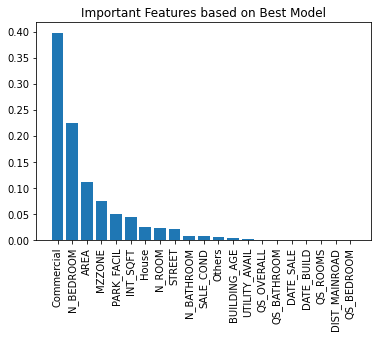

In [ ]:
Feature_imp=pd.DataFrame({'Important_Feature':Best_Model.feature_importances_},index=features)
Feature_imp=Feature_imp.Important_Feature.sort_values(ascending=False)
x_feature_imp=Feature_imp.index
y_feature_imp=Feature_imp
plt.title("Important Features based on Best Model")
plt.xticks(rotation=90)
plt.bar(x_feature_imp,y_feature_imp)

Builders should consider the below points while building the houses, this will help them to sell the houses quickly.



*   Choose the AREA which is popular or near to popular area.
*   Houses with Commercial space will be added advantage.
*   Parking Facility is must.
*   The street should have gravel or paving stone.
*   Provide Maximum Quality Space.
*   Build atleast two rooms and with attached Bathroom(s).
*   Make sure the availability of Basic utilites like Sewage,,Power-Backup,Lift,Security...








